<a href="https://colab.research.google.com/github/liortiz/ML-2021/blob/main/ML_2021_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h3><center>Introducción al Aprendizaje de Máquina</center>
<center>2021-I</center>
<center>Lizeth Catherine Ortiz Pulido</center>
<center>liortiz@unal.edu.co</center></h3>

# Ejercicio 1
Learning from data, Exercice 2.2

(a) Verifique la cota del teorema 2.4 en los tres casos del ejemplo 2.2: 

   (i) Rayos positivos: $\mathcal{H}$ consta de todas las hipótesis en una dimensión de la forma $h(x)=sign(x - a)$.

$$N+1=m_{\mathcal{H}}(N) \leq \sum^{k-1}_{i=0}{N \choose i}=\sum^{1}_{i=0}{N \choose i}=1+N$$



(ii) Intervalos positivos: $\mathcal{H}$ consta de todas las hipótesis en una dimensión que son positivas dentro de algún intervalo y negativas en otras partes.  

$$\frac{1}{2}N^2+\frac{1}{2}N+1=m_{\mathcal{H}}(N) \leq \sum^{k-1}_{i=0}{N \choose i}=\sum^{2}_{i=0}{N \choose i}=1+N+\frac{N(N-1)}{2}=1+\frac{1}{2}N+\frac{1}{2}N^2$$


(iii) Conjuntos convexos: $\mathcal{H}$ consta de todas las hipótesis en dos dimensiones que son positivas dentro de algún conjunto convexo y negativas en otras partes.  (Nota: puede usar los puntos de ruptura que encontró en el ejercicio 2.1.) 

$$2^N=m_{\mathcal{H}}(N) \leq \sum^{k-1}_{i=0}{N \choose i}\leq\sum^{N}_{i=0}{N \choose i}=2^N$$

(b) ¿Existe un conjunto de hipótesis para el cual $m_{\mathcal{H}}(N)=N+2^{\lfloor N/2 \rfloor}$ (donde $\lfloor N/2 \rfloor$ es el entero más grande $\leq N/$2)?

Si  $m_{\mathcal{H}} (N) = N+2^{\lfloor N/2 \rfloor}$, entonces el punto de ruptura $k=3$. De acuerdo con el teorema de la cota 2.4, tenemos para todo $N$, $m_{\mathcal{H}}(N)=N+2^{\lfloor N/2 \rfloor}\leq \sum^{2}_{i=0}{N\choose i}=1+\frac{1}{2}N+\frac{1}{2}N^2$. Pero cuando $N=15$, $m_{\mathcal{H}}(15)=143\leq \sum^{2}_{i=0}{15\choose i}=121$ es falso entonces no existe. 

# Ejercicio 2
Learning from data, Exercice 2.5

Suponga que tenemos un modelo de aprendizaje simple cuya función de crecimiento es $m_{\mathcal{H}}(N)=N+1$, por lo tanto $d_{vc} = 1$. Use el límite de VC (2.12) para estimar la probabilidad de que $E_{out}$ esté dentro de 0.1 de $E_{in}$ dado 100  ejemplos de formación.  [Sugerencia: la estimación será ridícula].



 $$\begin{align*}
d&=\sqrt{\frac{8}{N}\ln{\frac{4m_\mathcal{H}(2N)}{\delta}}}\\
d^2&=\frac{8}{N}(\ln{4m_\mathcal{H}(2N)}-\ln{\delta})\\
\ln{\delta}&=\ln{4m_\mathcal{H}(2N)}-\frac{N}{8}d^2\\
\delta&=4m_\mathcal{H}(2N)e^{-\frac{N}{8}d^2}\\
\end{align*}$$

In [1]:
import numpy as np
N = 100
d = 0.1
m_H = 2*N + 1
print('delta =', 4*m_H*np.exp(-N*d**2/8))

delta = 709.5275096780147


# Ejercicio 3
Learning from data, Exercice 2.6

Un conjunto de datos tiene 600 ejemplos.  Para probar adecuadamente el desempeño de la hipótesis final, usted aparta un subconjunto seleccionado al azar de 200 ejemplos que nunca se usan en la fase de entrenamiento;  estos forman un conjunto de prueba.  Utiliza un modelo de aprendizaje con 1.000 hipótesis y selecciona la hipótesis final $g$ basada en los 400 ejemplos de formación.  Deseamos estimar $E_{out}(g)$.  Tenemos acceso a dos estimaciones: $E_{in}(g)$, el error en la muestra en los 400 ejemplos de entrenamiento;  y, $E_{test}(g)$, el error de prueba en los 200 ejemplos de prueba que se dejaron de lado 

(a) Usando una tolerancia de error del 5% ($\delta = 0.05$), ¿qué estimación tiene la 'barra de error' más alta?  

In [2]:
delta = 0.05

N = 200
print('error prueba: ', np.sqrt((1/(2*N))*np.log(2/delta)))

M = 1000
N = 400
print('error muestra: ', np.sqrt((1/(2*N))*np.log(2*M/delta)))

error prueba:  0.09603227913199208
error muestra:  0.11509037065006825


Teniendo en cuenta el límite de generalización $E_{out}(g) \le E_{in}(g) + \sqrt{\frac{1}{2N}\ln{\frac{2M}{\delta}}}$, la barra de error del error en la muestra es más alta que la barra de error del error de prueba.

(b) ¿Hay alguna razón por la que no debería reservar aún más ejemplos para probar?

Tendríamos menos muestras para el entrenamiento causando que se construya una mala hipótesis a comparación si tenemos más muestras.

# Ejercicio 4
Learning from data, Problem 2.1

En la ecuación (2.1), establezca $\delta= 0.03$ y sea $$\epsilon(M,N, \delta)=\sqrt{\frac{1}{2N}\ln{\frac{2M}{\delta}}}$$

(a) Para $M = 1$, ¿cuántos ejemplos necesitamos para hacer $\epsilon\leq0.05$?  

$$\begin{align*}
\epsilon(M,N, \delta)=\sqrt{\frac{1}{2N}\ln{\frac{2M}{\delta}}}&\leq0.05\\
\frac{1}{2N}\ln{\frac{2M}{\delta}}&\leq0.0025\\
\ln{\frac{2M}{\delta}}&\leq0.005N\\
\frac{1}{0.005}\ln{\frac{2M}{\delta}}&\leq N
\end{align*}$$


In [3]:
print("N:",np.ceil((1/(0.005))*np.log(2*1/0.03)))

N: 840.0


(b) Para $M = 100$, ¿cuántos ejemplos necesitamos para hacer $\epsilon\leq0.05$?  

In [4]:
print("N:",np.ceil((1/(0.005))*np.log(2*100/0.03)))

N: 1761.0


(c) Para $M = 10,000$, ¿cuántos ejemplos necesitamos para hacer $\epsilon\leq0.05$?  

In [5]:
print("N:",np.ceil((1/(0.005))*np.log(2*10000/0.03)))

N: 2683.0


# Ejercicio 5
Learning from data, Problem 2.16

En este problema, consideraremos $\mathcal{X} = \mathbb{R}$. Es decir, x=$x$ es una variable unidimensional.  Para un conjunto de hipótesis $$\mathcal{H} = \Bigg\{h_c\Bigg|h_c(x) = sign\left(\sum^D_{i=0}c_ix^i\right)\Bigg\},$$ demuestre que la dimensión VC de $\mathcal{H}$ es exactamente $(D + 1)$ mostrando que 

(a) Hay $(D + 1)$ puntos que están destrozados por $\mathcal{H}$ 

Tomemos un conjunto $N=d+1$ en $\mathbb{R}$, $x_1,x_2,...,x_{d+1}$ para formar la matríz $d+1\times d+1$: $$X=\begin{bmatrix}1&x_1&...&x_{1}^{d}\\1&x_2&...&x_{2}^{d}\\\vdots&\vdots&\ddots&\vdots\\1&x_{d+1}&...&x_{d+1}^{d}\end{bmatrix}$$
Hay que tener en cuenta que $h_c$ está dado por $c$ así que queremos ver que existe $c$ tal que para un $Y$ fijo (donde cada entrada es $\pm1$) se tiene $Xc=Y$, y existe porque $c=X^{-1}Y$ al ser las filas de $X$ linealmente independientes.

(b) No hay puntos $(D + 2)$ que sean destrozados por $\mathcal{H}$.

Tomemos un conjunto de $N=d+2$ en $\mathbb{R}$, $x_1,x_2,...,x_{d+2}$, para formar la matriz $d+2\times d+1$:
$$X=\begin{bmatrix}1&x_1&...&x_{1}^{d}\\1&x_2&...&x_{2}^{d}\\\vdots&\vdots&\ddots&\vdots\\1&x_{d+1}&...&x_{d+1}^{d}\\1&x_{d+2}&...&x_{d+2}^{d}\end{bmatrix}$$
Si tomamos $d+1$ filas de $X$ es fácil ver que son linealmente independientes entonces generan una base de $\mathbb{R}^{d+1}$ luego la fila que no tomamos de $X$ tiene que ser es una combinación lineal de las $d+1$ filas que tomamos pero la única manera de que pase es que sea igual a uno de ellos por como se construye estas filas. 


De lo anterior, vemos que la dimensión VC de $\mathcal{H}$ es exactamente $D+1$.

# Ejercicio 6
Learning from data, Problem 2.20

Hay una serie de límites en el error de generalización $\epsilon$, todos con probabilidad de al menos $1-\delta$. 

(a) Límite de VC original: $$\epsilon\leq\sqrt{\frac{8}{N}\ln{\frac{4m_{\mathcal{H}}(2N)}{\delta}}}$$ 

(b) Límite de penalización de Rademacher: $$\epsilon\leq\sqrt{\frac{2\ln{(2Nm_{\mathcal{H}}(N))}}{N}}+\sqrt{\frac{2}{N}\ln{\frac{1}{\delta}}}+\frac{1}{N}$$  

(c) Parrondo y Van den Broek: $$\epsilon\leq\sqrt{\frac{1}{N}\left(2\epsilon+\ln{\frac{6m_{\mathcal{H}}(2N)}{\delta}}\right)}$$ 


(d) Devroye: $$\epsilon\leq\sqrt{\frac{1}{2N}\left(4\epsilon(1+\epsilon)\ln{\frac{4m_{\mathcal{H}}(N^2)}{\delta}}\right)}$$ 

Tenga en cuenta que (c) y (d) son límites implícitos en $\epsilon$.  Fije $d_{vc}=50$ y $\delta= 0.05$ y grafique estos límites como una función de $N$. ¿Cuál es mejor?

Primero despejamos $\epsilon$ en (c) y (d):

(c)
\begin{align*}
\epsilon&\leq\sqrt{\frac{1}{N}\left(2\epsilon+\ln{\frac{6m_{\mathcal{H}}(2N)}{\delta}}\right)}\\
\epsilon &\leq \frac{1}{N} + \sqrt{\frac{1}{N^2} + \frac{1}{N}\ln\frac{6m_{\mathcal{H}}(2N)}{\delta}}
\end{align*}
(d) 
\begin{align*}
\epsilon&\leq\sqrt{\frac{1}{2N}\left(4\epsilon(1+\epsilon)\ln{\frac{4m_{\mathcal{H}}(N^2)}{\delta}}\right)}\\
\epsilon &\leq \frac{1}{N-2} + \sqrt{\frac{1}{(N-2)^2} + \frac{1}{2(N-2)}\ln\frac{4m_{\mathcal{H}}(N^2)}{\delta}}\\
\end{align*}

In [6]:
import numpy as np
import matplotlib.pyplot as plt
#Parámetros
d_vc = 50.0
delta = 0.05
def m_H(N):
  return N**50+1

#Límites
def vc(N):
    return np.sqrt((8/N)*np.log(4*m_H(2*N)/delta))

def rademacher(N):
    return np.sqrt(2*np.log(2*N*m_H(N))/N) + np.sqrt((2/N)*np.log(1/delta)) + 1/N

def pvdb(N):
    return 1/N + np.sqrt(1/N**2 + (1/N)*np.log(6*m_H(2*N)/delta))

def devroye(N):
    return 1/(N-2) + np.sqrt(1/(N-2)**2 + 1/(2*(N-2))*np.log(4*m_H(N**2)/delta))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in double_scalars


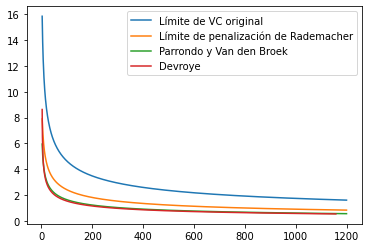

In [7]:
x = np.arange(3, 1200)*1.0
y1,y2,y3,y4= [],[],[],[]
for N in x:
    y1.append(vc(N))
    y2.append(rademacher(N))
    y3.append(pvdb(N))
    y4.append(devroye(N))

plt.plot(x, y1, label='Límite de VC original')
plt.plot(x, y2, label='Límite de penalización de Rademacher')
plt.plot(x, y3, label='Parrondo y Van den Broek')
plt.plot(x, y4, label='Devroye')
plt.legend()
plt.show()

Es mejor Devroye porque es menor, aunque la Parrondo y Van den Broek se acerca mucho que casi no se diferencian.